# Heterogeneous CLUE performance analysis

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
from matplotlib import rc
from matplotlib import gridspec

rc('text', usetex=False)
rc('font', family='serif', size=34)
rc('figure', figsize=(28,15.75))
rc('axes',linewidth=2)

# CPU vs GPU on Olice-05
Comparison between Intel Xeon Gold 6336Y CPU and Arctic Sound P GPU on Olice-05 CERN machine. 2 by 2 scaling of CPU threads and streams from 1 to 20.
```bash
# CPU
for i in {1..10}; do taskset -c 0 ./sycl --dim 2 --device cpu --maxEvents 1000 --numberOfThreads 1 >> cpu_1.txt; sleep 1; done

# GPU
for i in {1..10}; do numactl -N 1 ./sycl --dim 2 --device level_zero --maxEvents 10000 --numberOfThreads 1 >> gpu_1.txt; sleep 1; done
```
Used mean of 10 runs for total throughput and standard deviation as error.
Tested on 1000 events on CPU. On GPU the sample is always over 10000 events.

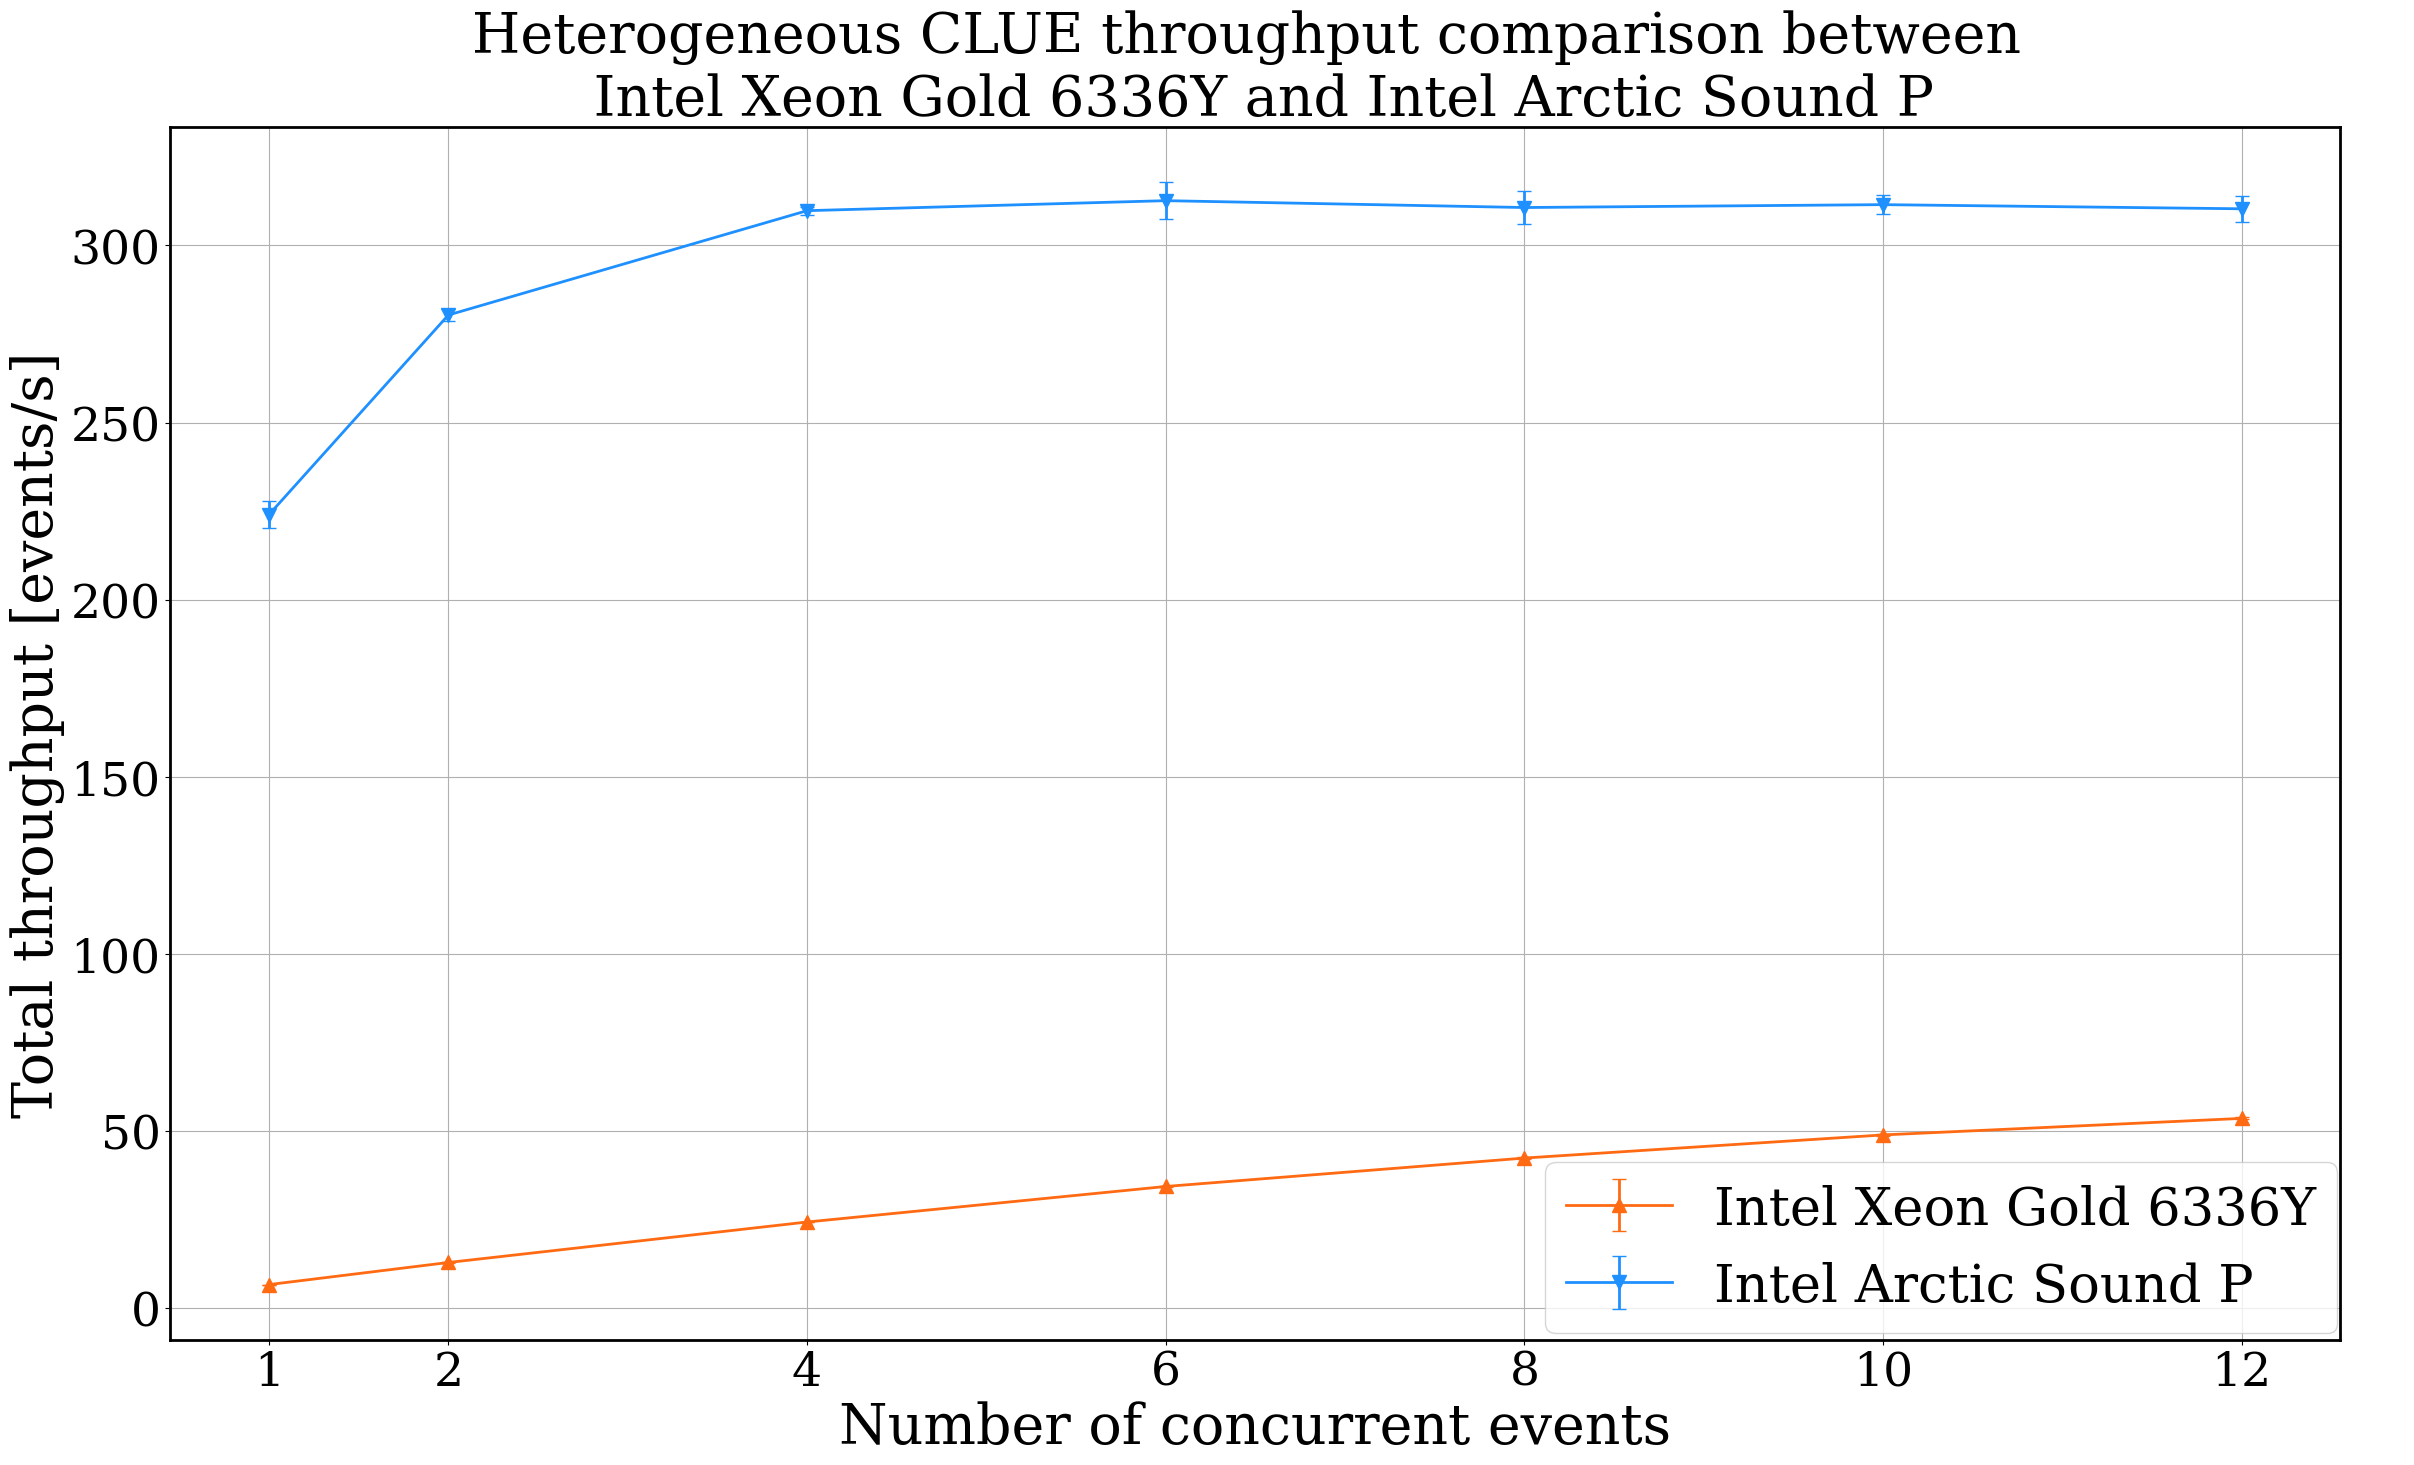

In [3]:
n_streams = (1,2,4,6,8,10,12)

olice_cpu = pd.read_csv("data/2d/olice_cpu.csv")["mean"]
err_olice_cpu = pd.read_csv("data/2d/olice_cpu.csv")["std"]

olice_gpu = pd.read_csv("data/2d/olice_gpu.csv")["mean"]
err_olice_gpu = pd.read_csv("data/2d/olice_gpu.csv")["std"]


fig,ax = plt.subplots()

ax.errorbar(n_streams, olice_cpu[:7], err_olice_cpu[:7], label="Intel Xeon Gold 6336Y", linewidth=2,
                marker='^', markersize=10, color='#FF6A13', mfc='#FF6A13', mec="#FF6A13", ecolor='#FF6A13', capsize=5)           
ax.set_xlabel("Number of concurrent events", fontsize = 40)
ax.set_ylabel("Total throughput [events/s]", fontsize=40)
ax.set_xticks(n_streams)
ax.grid(True)


ax.errorbar(n_streams, olice_gpu, err_olice_gpu, label="Intel Arctic Sound P", linewidth=2, marker='v', markersize=10,
            color='dodgerblue', mfc='dodgerblue', mec="dodgerblue", ecolor='dodgerblue', capsize=5)

fig.legend(loc=(0.64,0.09), fontsize=38)
plt.xlabel("Number of concurrent events", fontsize = 40)
plt.ylabel("Total throughput [events/s]", fontsize=40)
plt.title("Heterogeneous CLUE throughput comparison between \n Intel Xeon Gold 6336Y and Intel Arctic Sound P", fontsize=40)
plt.show()

# CPU implementations
Running on AMD Ryzen 9 5900X (Patatrack03) with 2 by 2 scaling of threads from 1 to 12. 

Command used:
```bash
for i in {1..10}; do taskset -c 0 ./sycl --dim 3 --device cpu --maxEvents 1000 --numberOfThreads 1 >> sycl_1.txt; sleep 1; done
```
Used mean of 10 runs for total throughput and standard deviation as error.
Tested on 1000 events.

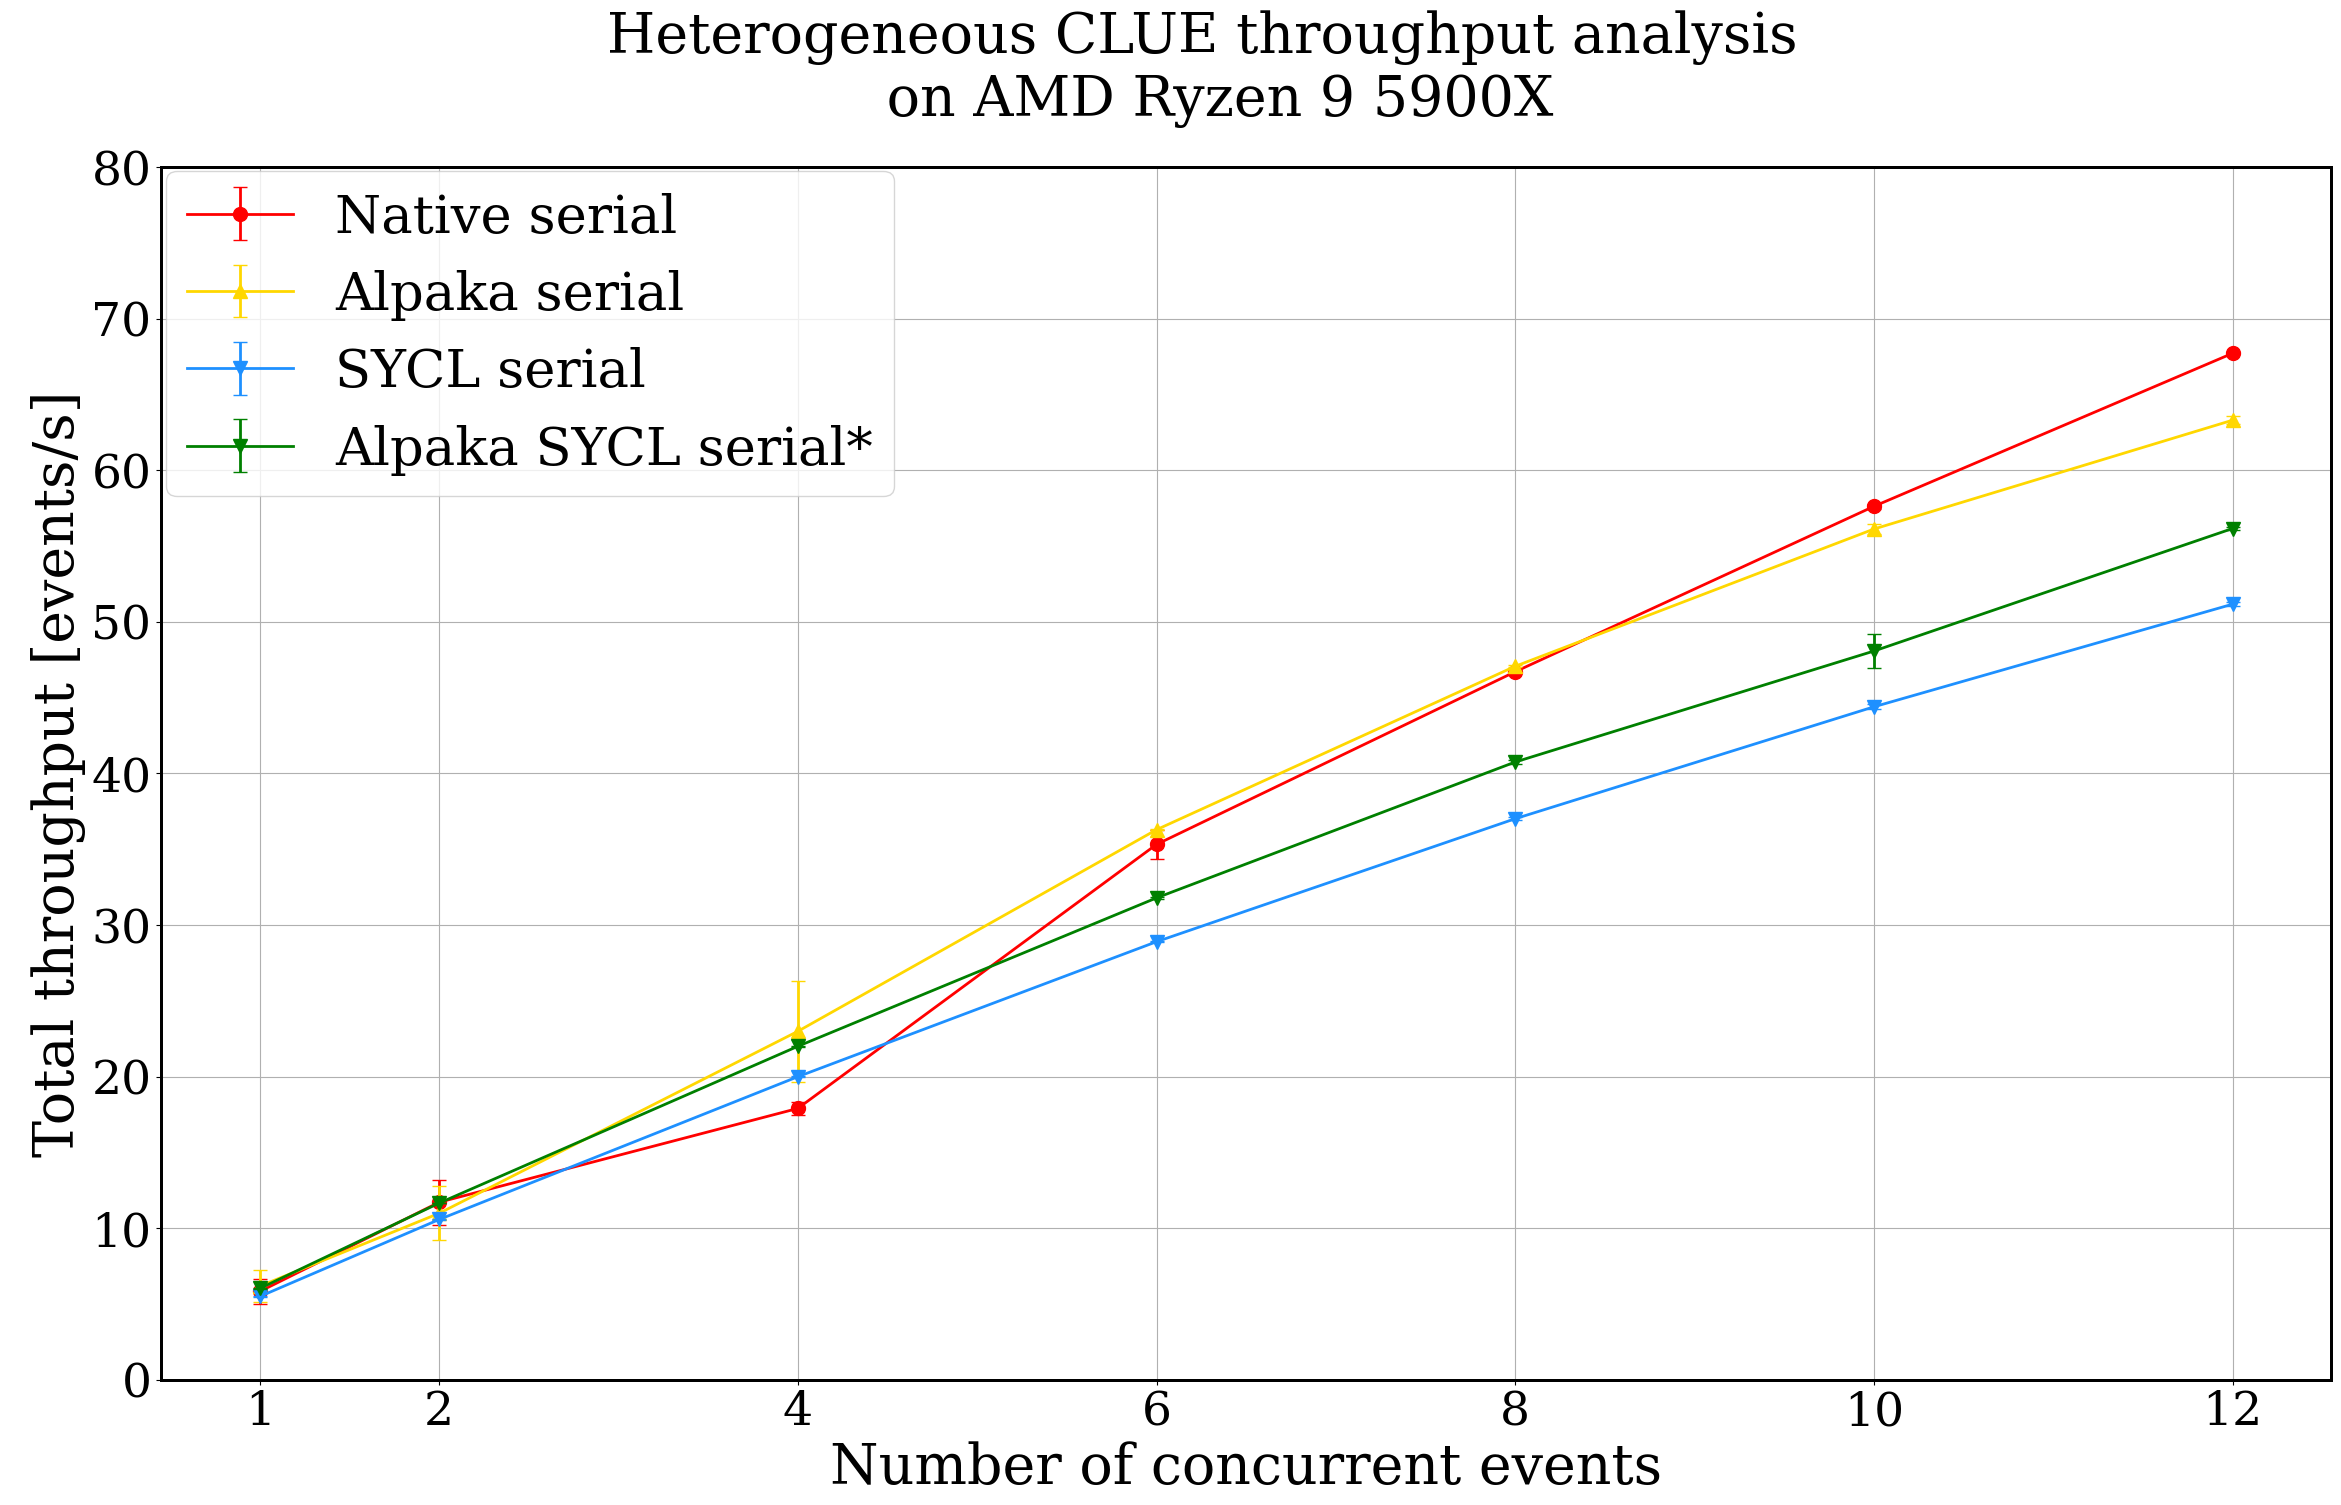

In [4]:
n_threads = (1,2,4,6,8,10,12)

alpaka_cpu = pd.read_csv("data/2d/alpaka_serial.csv")["mean"]
err_alpaka_cpu = pd.read_csv("data/2d/alpaka_serial.csv")["std"]

serial = pd.read_csv("data/2d/serial.csv")["mean"]
err_serial = pd.read_csv("data/2d/serial.csv")["std"]

sycl_cpu = pd.read_csv("data/2d/sycl_serial.csv")["mean"]
err_sycl_cpu = pd.read_csv("data/2d/sycl_serial.csv")["std"]

alpaka_sycl_cpu = pd.read_csv("data/2d/alpaka_sycl_serial.csv")["mean"]
err_alpaka_sycl_cpu = pd.read_csv("data/2d/alpaka_sycl_serial.csv")["std"]


fig,ax = plt.subplots()
ax.errorbar(n_threads, serial, err_serial, label="Native serial", linewidth=2,
                marker='o', markersize=10, color='red', mfc='red', mec="red", ecolor='red', capsize=5)
ax.set_xlabel("Number of concurrent events", fontsize = 40)
ax.set_ylabel("Total throughput [events/s]", fontsize=40)
ax.set_ylim(0,80)
ax.set_xticks(n_threads)
ax.grid(True)

ax2=ax.twiny()
ax2.axes.xaxis.set_visible(False)
ax2.errorbar(n_threads, alpaka_cpu, err_alpaka_cpu, label="Alpaka serial", linewidth=2,
                marker='^', markersize=10, color='gold', mfc='gold', mec="gold", ecolor='gold', capsize=5)           



ax3=ax.twiny()
ax3.axes.xaxis.set_visible(False)
ax3.errorbar(n_threads, sycl_cpu, err_sycl_cpu, label="SYCL serial", linewidth=2, marker='v', markersize=10,
            color='dodgerblue', mfc='dodgerblue', mec="dodgerblue", ecolor='dodgerblue', capsize=5)

ax4=ax.twiny()
ax4.axes.xaxis.set_visible(False)
ax4.errorbar(n_threads, alpaka_sycl_cpu, err_alpaka_sycl_cpu, label="Alpaka SYCL serial*", linewidth=2, marker='v', markersize=10,
            color='green', mfc='green', mec="green", ecolor='green', capsize=5)

fig.suptitle("Heterogeneous CLUE throughput analysis \n on AMD Ryzen 9 5900X", fontsize=40)
fig.legend(loc=(0.071,0.67), fontsize=38)

plt.show()

# CUDA compatibility
AMD Ryzen 5990X + NVIDIA GTX 1080Ti running alpaka and SYCL code. 2 by 2 scaling of CPU threads (concurrent events) from 1 to 12.

Command used:
```bash
for i in {1..10}; do ./sycl --dim 3 --device gpu --maxEvents 10000 --numberOfThreads 1 >> sycl_cuda_1.txt; sleep 1; done
```
Used mean of 10 runs for total throughput and standard deviation as error.
Tested on 10000 events.

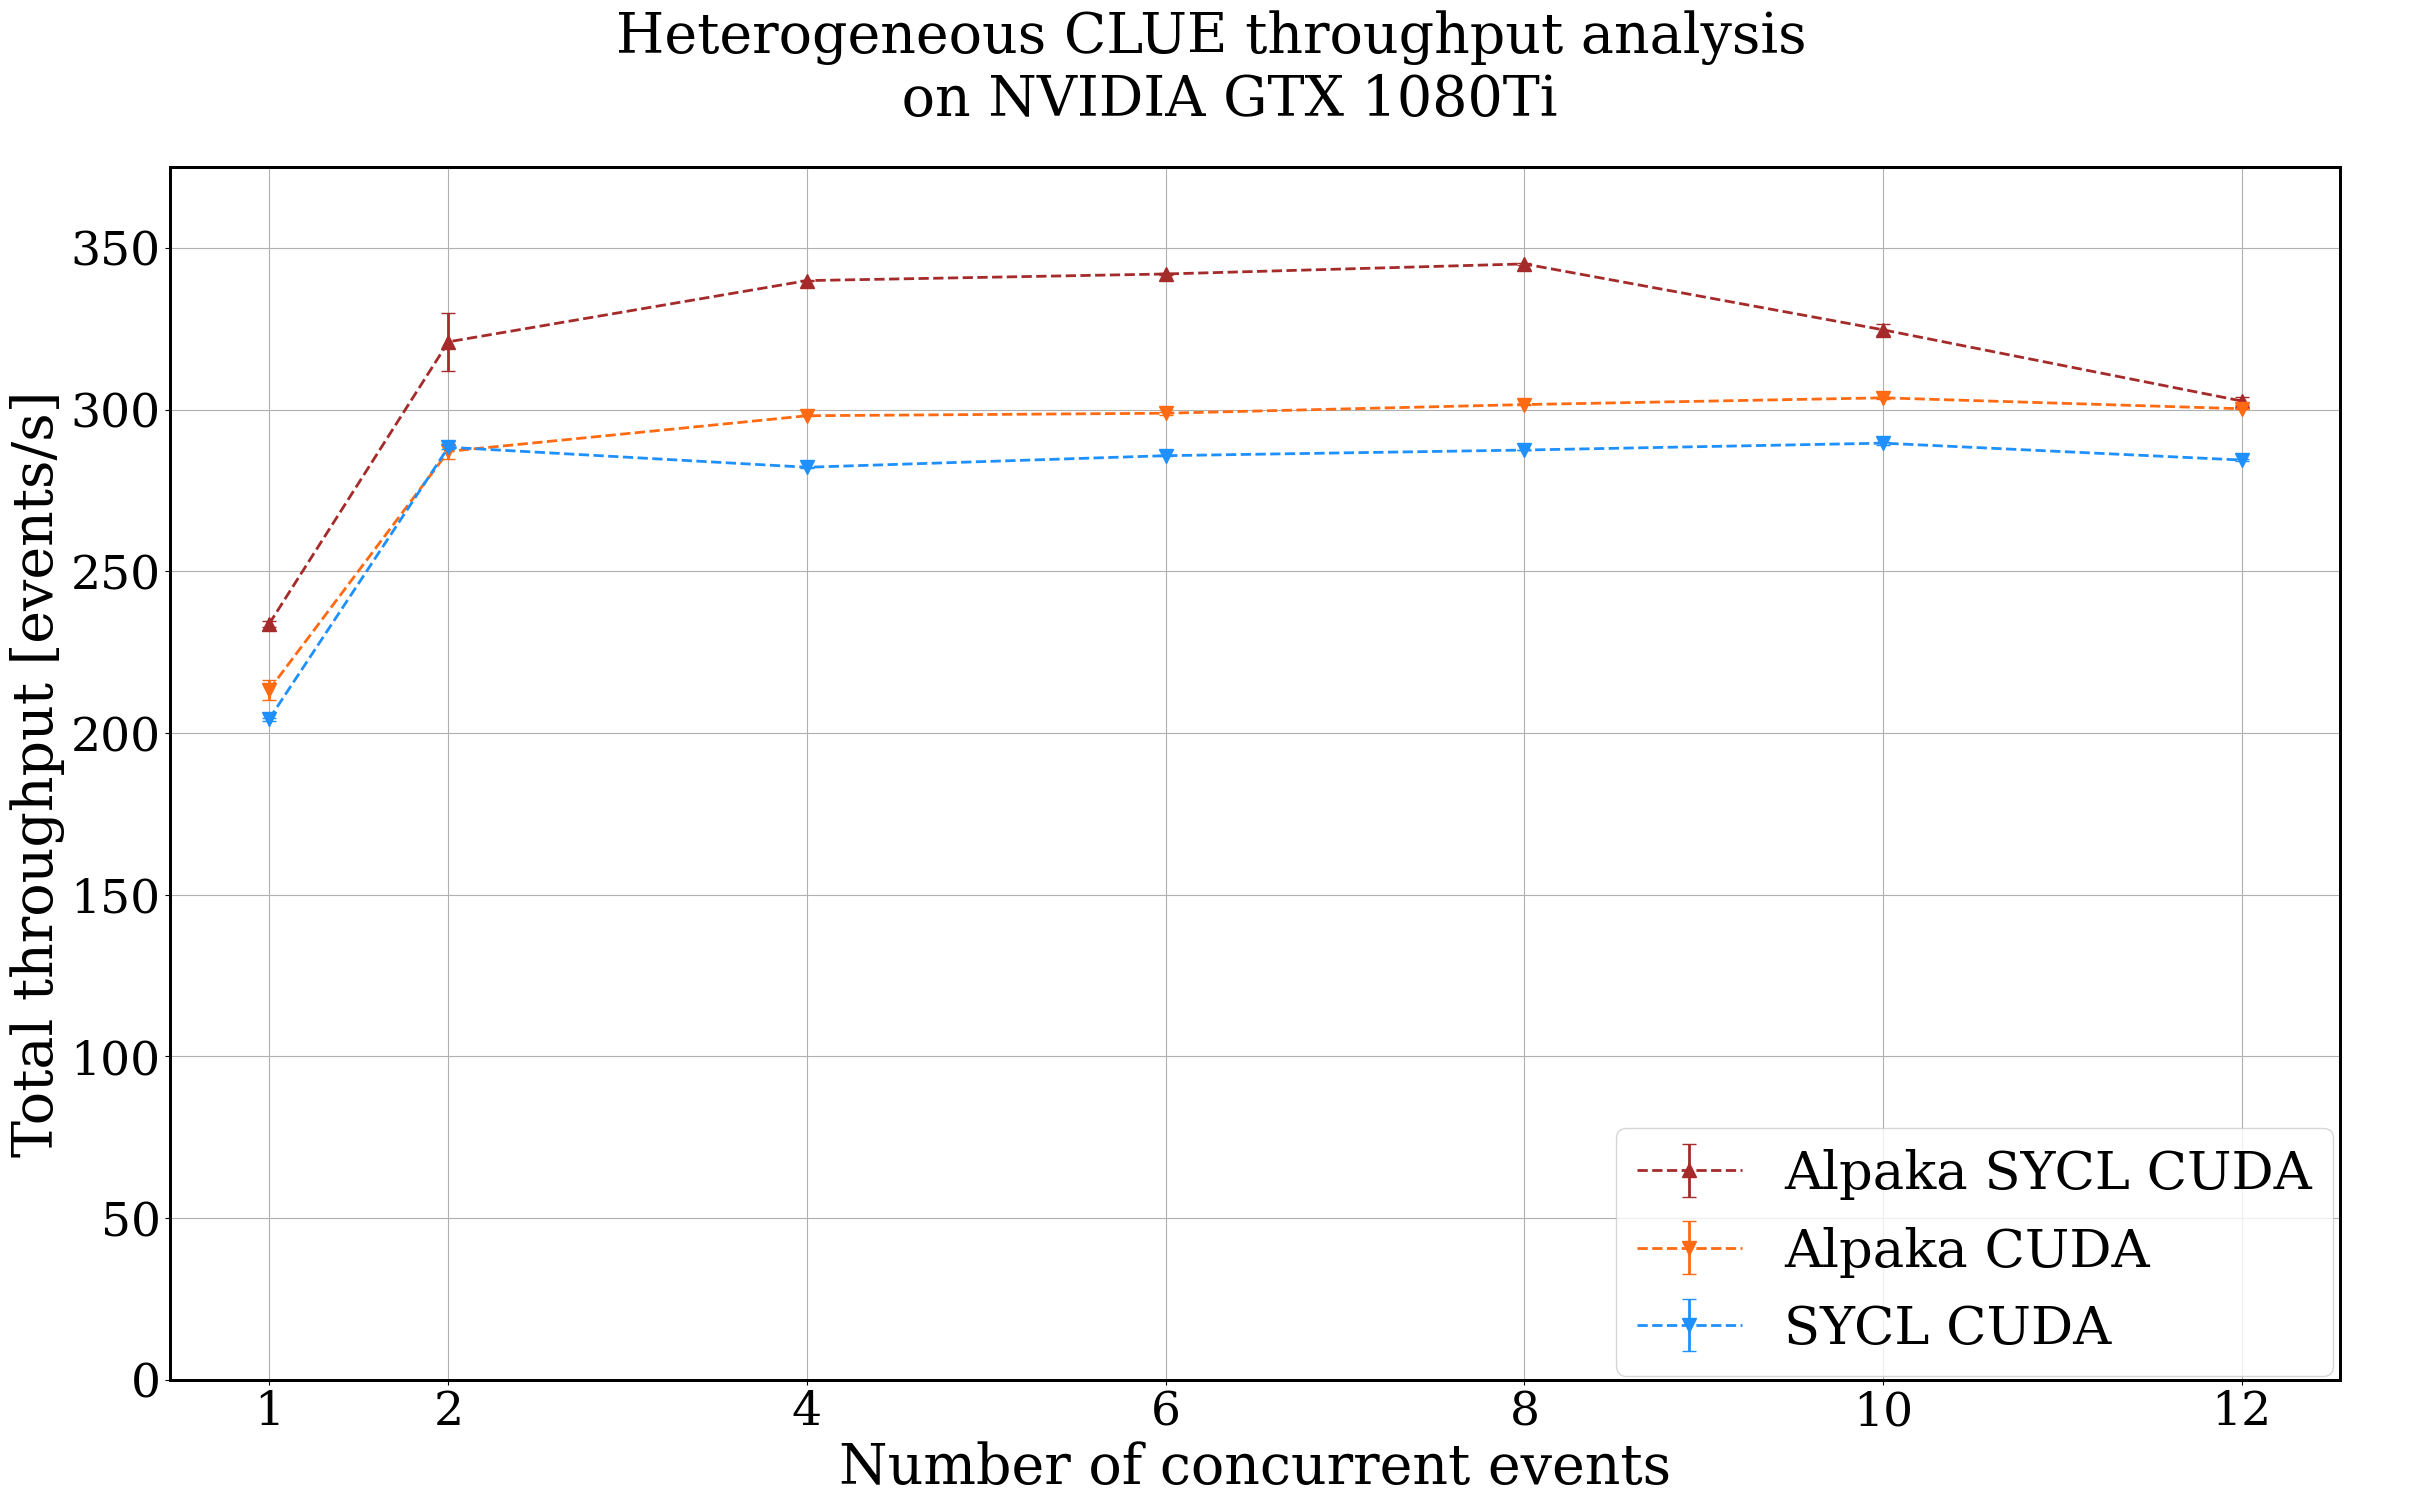

In [5]:
n_threads = (1,2,4,6,8,10,12)

alpaka_sycl_cuda = pd.read_csv("data/2d/alpaka_sycl_cuda.csv")["mean"]
err_alpaka_sycl_cuda = pd.read_csv("data/2d/alpaka_sycl_cuda.csv")["std"]

alpaka_cuda = pd.read_csv("data/2d/alpaka_cuda.csv")["mean"]
err_alpaka_cuda = pd.read_csv("data/2d/alpaka_cuda.csv")["std"]

sycl_cuda = pd.read_csv("data/2d/sycl_cuda.csv")["mean"]
err_sycl_cuda = pd.read_csv("data/2d/sycl_cuda.csv")["std"]


fig,ax = plt.subplots()
ax.errorbar(n_threads, alpaka_sycl_cuda, err_alpaka_sycl_cuda, label="Alpaka SYCL CUDA", linewidth=2, linestyle='dashed',
                marker='^', markersize=10, color='brown', mfc='brown', mec="brown", ecolor='brown', capsize=5)           
ax.set_xlabel("Number of concurrent events", fontsize = 40)
ax.set_ylabel("Total throughput [events/s]", fontsize=40)
ax.set_ylim(0,375)
ax.set_xticks(n_threads)
ax.grid(True)

ax2=ax.twiny()
ax2.axes.xaxis.set_visible(False)
ax2.errorbar(n_threads, alpaka_cuda, err_alpaka_cuda, label="Alpaka CUDA", linewidth=2, marker='v', markersize=10,
            linestyle='dashed', color='#FF6A13', mfc='#FF6A13', mec="#FF6A13", ecolor='#FF6A13', capsize=5)

ax3=ax.twiny()
ax3.axes.xaxis.set_visible(False)
ax3.errorbar(n_threads, sycl_cuda, err_sycl_cuda, label="SYCL CUDA", linewidth=2, marker='v', markersize=10,
            linestyle='dashed', color='dodgerblue', mfc='dodgerblue', mec="dodgerblue", ecolor='dodgerblue', capsize=5)

fig.suptitle("Heterogeneous CLUE throughput analysis \n on NVIDIA GTX 1080Ti", fontsize=40)
fig.legend(loc=(0.668,0.086), fontsize=38)

plt.show()

# Patatrack03 full comparison CPU and GPU

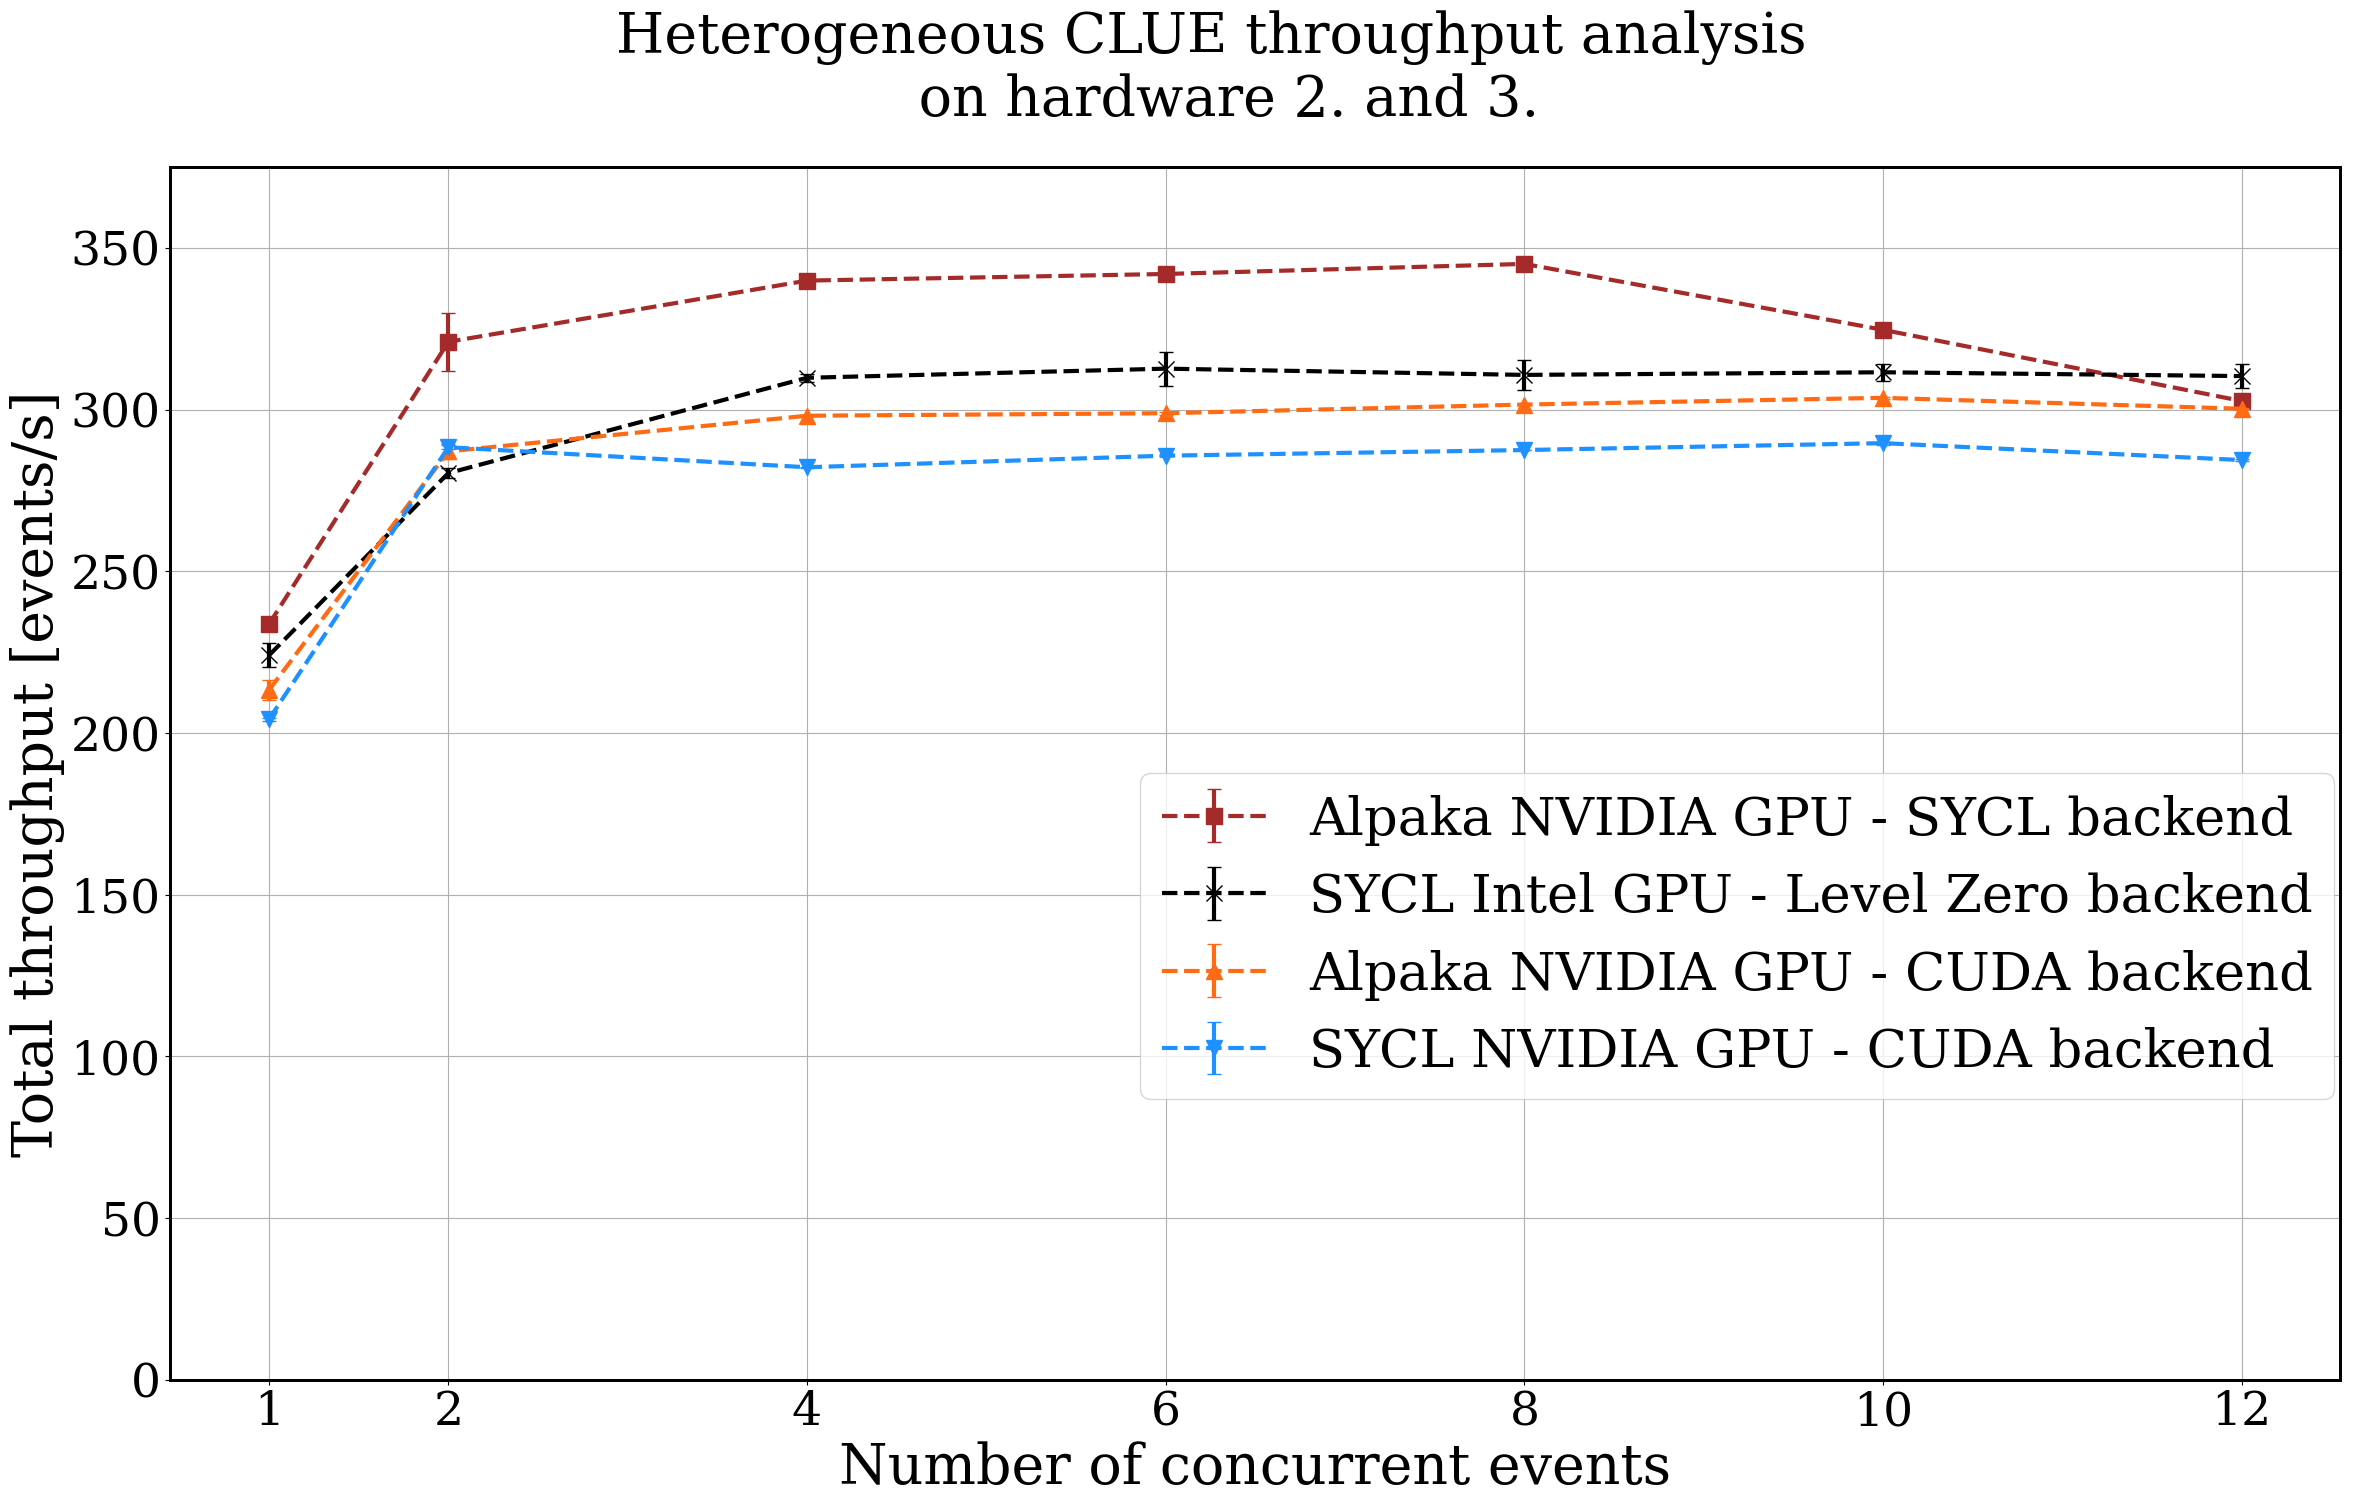

In [6]:
n_threads = (1,2,4,6,8,10,12)

alpaka_sycl_cuda = pd.read_csv("data/2d/alpaka_sycl_cuda.csv")["mean"]
err_alpaka_sycl_cuda = pd.read_csv("data/2d/alpaka_sycl_cuda.csv")["std"]

alpaka_cuda = pd.read_csv("data/2d/alpaka_cuda.csv")["mean"]
err_alpaka_cuda = pd.read_csv("data/2d/alpaka_cuda.csv")["std"]

sycl_cuda = pd.read_csv("data/2d/sycl_cuda.csv")["mean"]
err_sycl_cuda = pd.read_csv("data/2d/sycl_cuda.csv")["std"]

sycl_gpu = pd.read_csv("data/2d/olice_gpu.csv")["mean"]
err_sycl_gpu = pd.read_csv("data/2d/olice_gpu.csv")["std"]

fig,ax = plt.subplots()
ax.errorbar(n_threads, alpaka_sycl_cuda, err_alpaka_sycl_cuda, label="Alpaka NVIDIA GPU - SYCL backend", linewidth=3, linestyle='dashed',
                marker='s', markersize=12, color='brown', mfc='brown', mec="brown", ecolor='brown', capsize=5)           
ax.set_xlabel("Number of concurrent events", fontsize = 40)
ax.set_ylabel("Total throughput [events/s]", fontsize=40)
ax.set_ylim(0,375)
ax.set_xticks(n_threads)
ax.grid(True)


ax2=ax.twiny()
ax2.axes.xaxis.set_visible(False)
ax2.errorbar(n_threads, sycl_gpu, err_sycl_gpu, label="SYCL Intel GPU - Level Zero backend", linewidth=3, marker='x', markersize=12,
            linestyle='dashed', color='black', mfc='black', mec="black", ecolor='black', capsize=5)

ax3=ax.twiny()
ax3.axes.xaxis.set_visible(False)
ax3.errorbar(n_threads, alpaka_cuda, err_alpaka_cuda, label="Alpaka NVIDIA GPU - CUDA backend", linewidth=3, marker='^', markersize=12,
            linestyle='dashed', color='#FF6A13', mfc='#FF6A13', mec="#FF6A13", ecolor='#FF6A13', capsize=5)

ax4=ax.twiny()
ax4.axes.xaxis.set_visible(False)
ax4.errorbar(n_threads, sycl_cuda, err_sycl_cuda, label="SYCL NVIDIA GPU - CUDA backend", linewidth=3, marker='v', markersize=12,
            linestyle='dashed', color='dodgerblue', mfc='dodgerblue', mec="dodgerblue", ecolor='dodgerblue', capsize=5)

fig.suptitle("Heterogeneous CLUE throughput analysis \n on AMD Ryzen 9 5900X + NVIDIA GTX 1080Ti / Intel Arctic Sound P", fontsize=40)
fig.legend(loc=(0.481,0.27), fontsize=38)

plt.show()

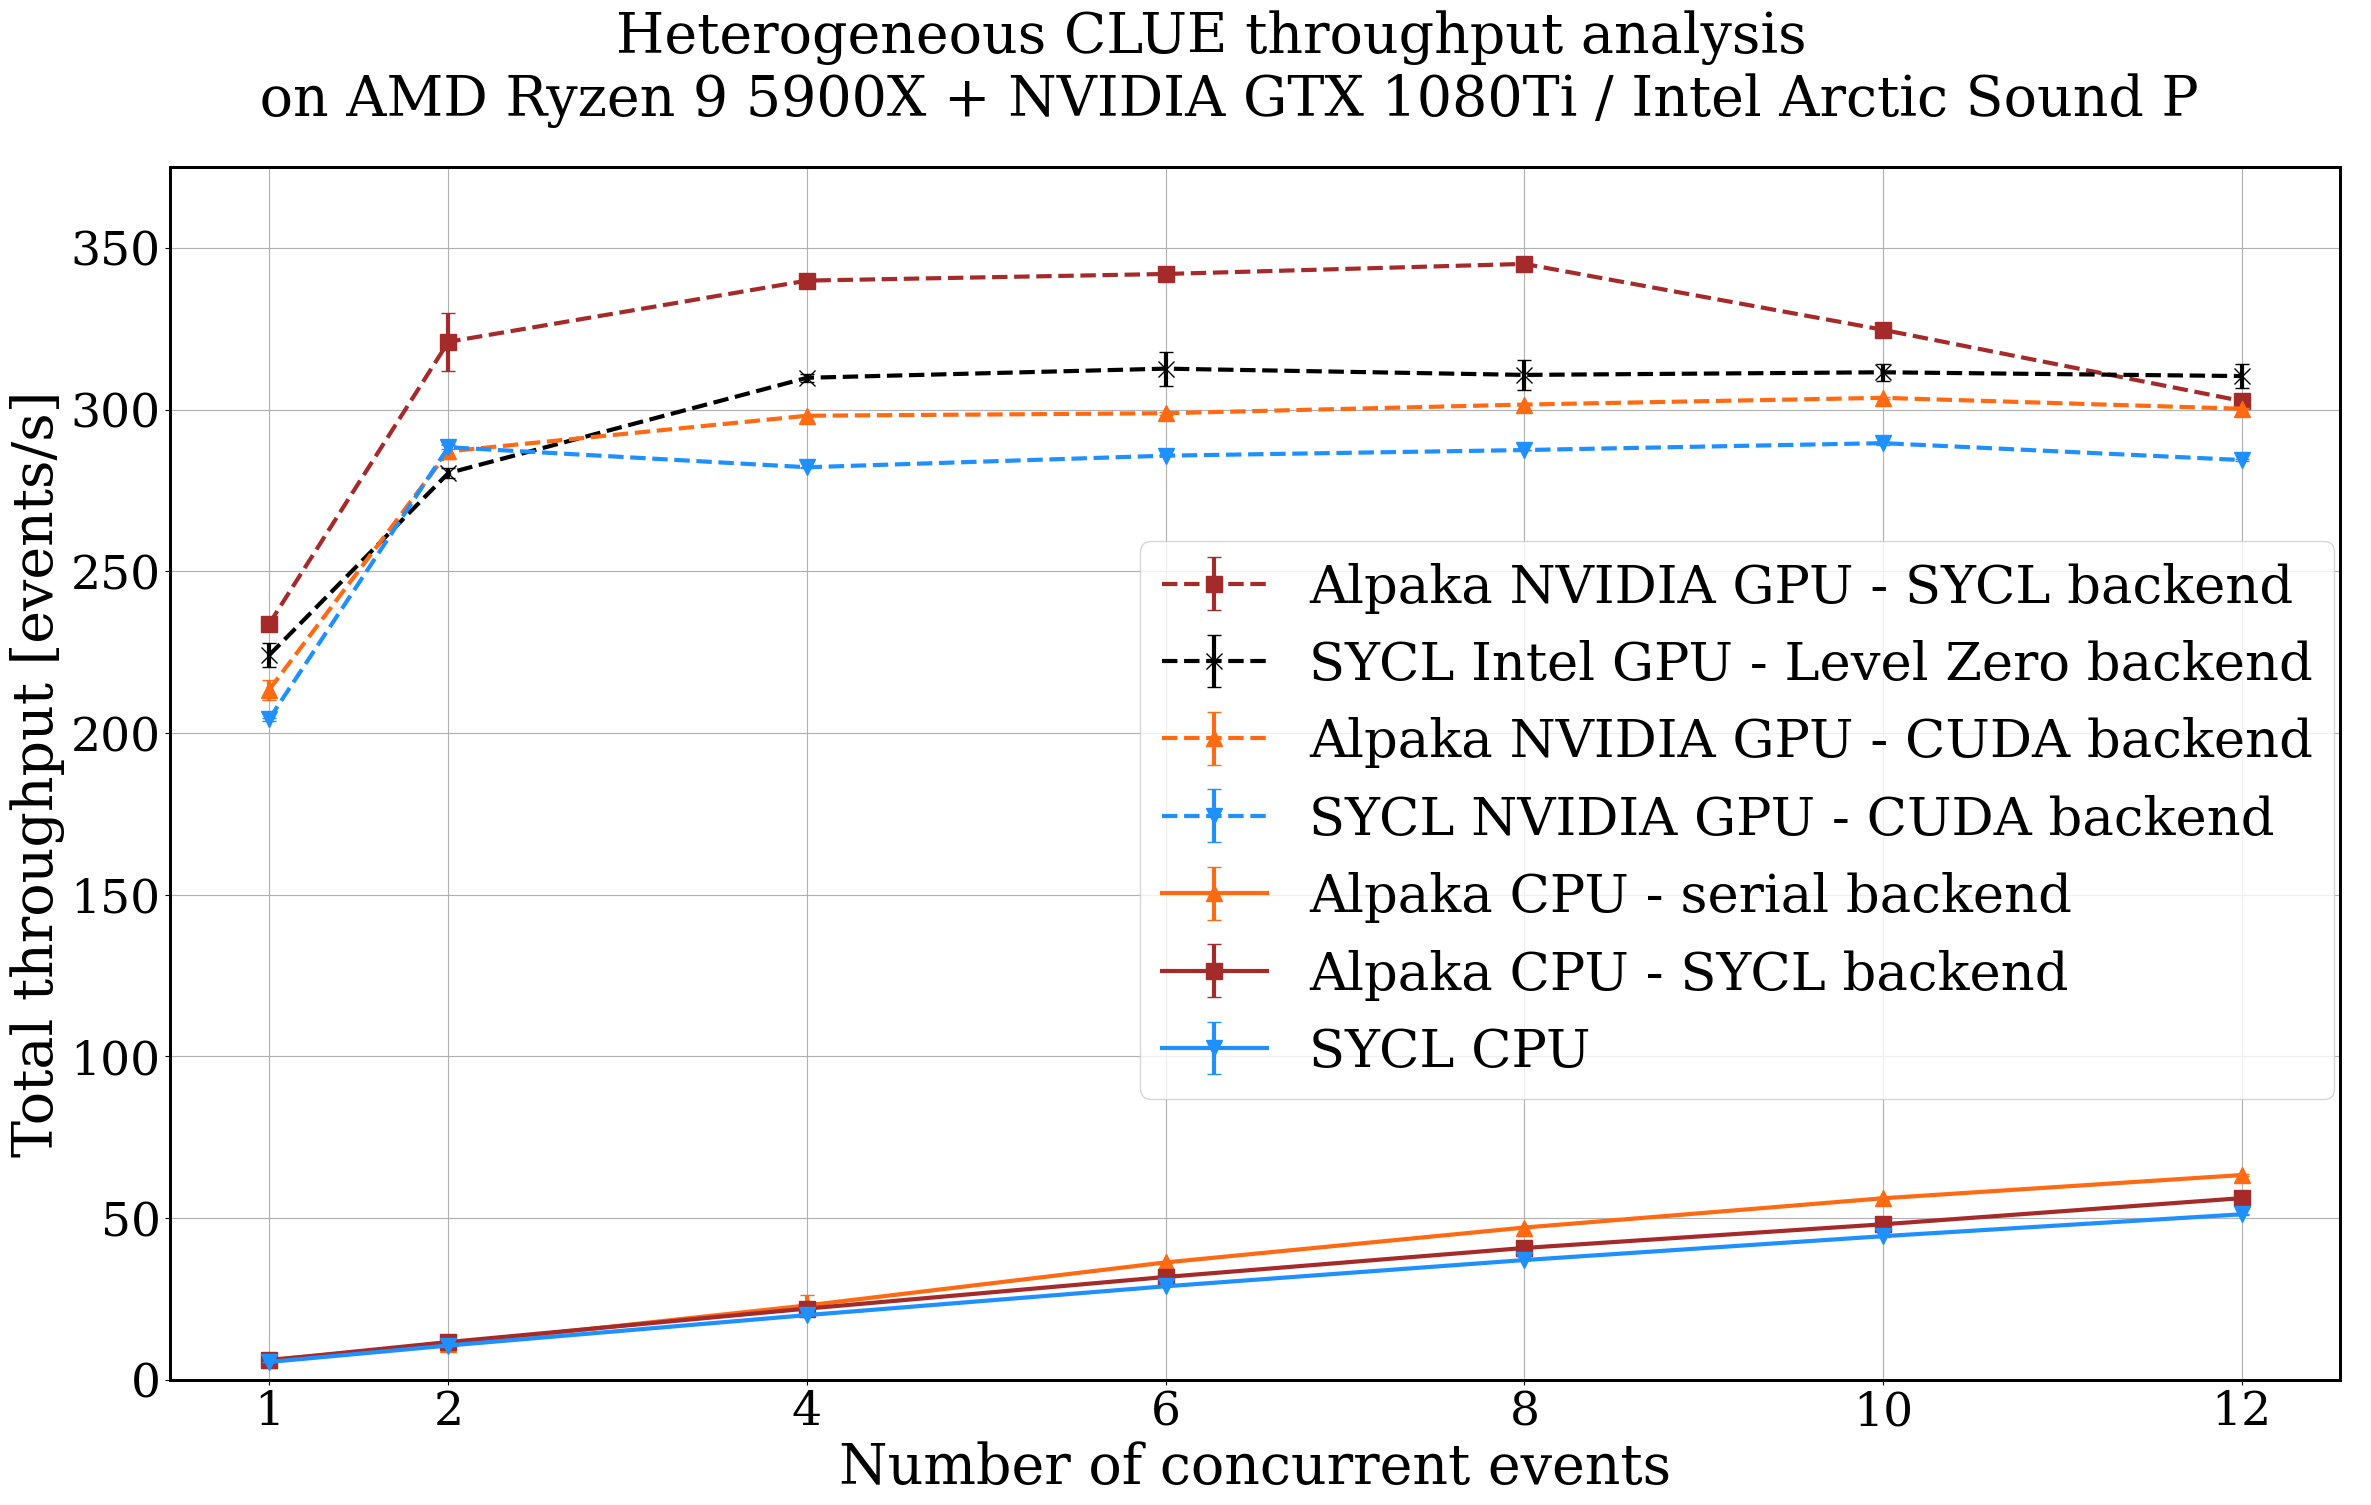

In [10]:
n_threads = (1,2,4,6,8,10,12)

alpaka_sycl_cuda = pd.read_csv("data/2d/alpaka_sycl_cuda.csv")["mean"]
err_alpaka_sycl_cuda = pd.read_csv("data/2d/alpaka_sycl_cuda.csv")["std"]

alpaka_cuda = pd.read_csv("data/2d/alpaka_cuda.csv")["mean"]
err_alpaka_cuda = pd.read_csv("data/2d/alpaka_cuda.csv")["std"]

sycl_cuda = pd.read_csv("data/2d/sycl_cuda.csv")["mean"]
err_sycl_cuda = pd.read_csv("data/2d/sycl_cuda.csv")["std"]

alpaka_cpu = pd.read_csv("data/2d/alpaka_serial.csv")["mean"]
err_alpaka_cpu = pd.read_csv("data/2d/alpaka_serial.csv")["std"]

serial = pd.read_csv("data/2d/serial.csv")["mean"]
err_serial = pd.read_csv("data/2d/serial.csv")["std"]

sycl_cpu = pd.read_csv("data/2d/sycl_serial.csv")["mean"]
err_sycl_cpu = pd.read_csv("data/2d/sycl_serial.csv")["std"]


sycl_gpu = pd.read_csv("data/2d/olice_gpu.csv")["mean"]
err_sycl_gpu = pd.read_csv("data/2d/olice_gpu.csv")["std"]

alpaka_sycl_cpu = pd.read_csv("data/2d/alpaka_sycl_serial.csv")["mean"]
err_alpaka_sycl_cpu = pd.read_csv("data/2d/alpaka_sycl_serial.csv")["std"]


fig,ax = plt.subplots()
ax.errorbar(n_threads, alpaka_sycl_cuda, err_alpaka_sycl_cuda, label="Alpaka NVIDIA GPU - SYCL backend", linewidth=3, linestyle='dashed',
                marker='s', markersize=12, color='brown', mfc='brown', mec="brown", ecolor='brown', capsize=5)           
ax.set_xlabel("Number of concurrent events", fontsize = 40)
ax.set_ylabel("Total throughput [events/s]", fontsize=40)
ax.set_ylim(0,375)
ax.set_xticks(n_threads)
ax.grid(True)


ax2=ax.twiny()
ax2.axes.xaxis.set_visible(False)
ax2.errorbar(n_threads, sycl_gpu, err_sycl_gpu, label="SYCL Intel GPU - Level Zero backend", linewidth=3, marker='x', markersize=12,
            linestyle='dashed', color='black', mfc='black', mec="black", ecolor='black', capsize=5)

ax3=ax.twiny()
ax3.axes.xaxis.set_visible(False)
ax3.errorbar(n_threads, alpaka_cuda, err_alpaka_cuda, label="Alpaka NVIDIA GPU - CUDA backend", linewidth=3, marker='^', markersize=12,
            linestyle='dashed', color='#FF6A13', mfc='#FF6A13', mec="#FF6A13", ecolor='#FF6A13', capsize=5)

ax4=ax.twiny()
ax4.axes.xaxis.set_visible(False)
ax4.errorbar(n_threads, sycl_cuda, err_sycl_cuda, label="SYCL NVIDIA GPU - CUDA backend", linewidth=3, marker='v', markersize=12,
            linestyle='dashed', color='dodgerblue', mfc='dodgerblue', mec="dodgerblue", ecolor='dodgerblue', capsize=5)

ax5=ax.twiny()
ax5.axes.xaxis.set_visible(False)
ax5.errorbar(n_threads, alpaka_cpu, err_alpaka_cpu, label="Alpaka CPU - serial backend", linewidth=3,
                marker='^', markersize=12, color='#FF6A13', mfc='#FF6A13', mec="#FF6A13", ecolor='#FF6A13', capsize=5)  

ax6=ax.twiny()
ax6.axes.xaxis.set_visible(False)
ax6.errorbar(n_threads, alpaka_sycl_cpu, err_alpaka_sycl_cpu, label="Alpaka CPU - SYCL backend", linewidth=3,
                marker='s', markersize=12, color='brown', mfc='brown', mec="brown", ecolor='brown', capsize=5)

ax7=ax.twiny()
ax7.axes.xaxis.set_visible(False)
ax7.errorbar(n_threads, sycl_cpu, err_sycl_cpu, label="SYCL CPU", linewidth=3, marker='v', markersize=12,
            color='dodgerblue', mfc='dodgerblue', mec="dodgerblue", ecolor='dodgerblue', capsize=5)     



fig.suptitle("Heterogeneous CLUE throughput analysis \n on AMD Ryzen 9 5900X + NVIDIA GTX 1080Ti / Intel Arctic Sound P", fontsize=40)
fig.legend(loc=(0.481,0.27), fontsize=38)

plt.show()

# Alpaka SYCL performance on Olice-05
All CPU implementations tested on 1000 events with 2 by 2 scaling of threads from 1 to 20.

All GPU implementations tested on 10000 events with 2 by 2 scaling of CPU threads from 1 to 20.

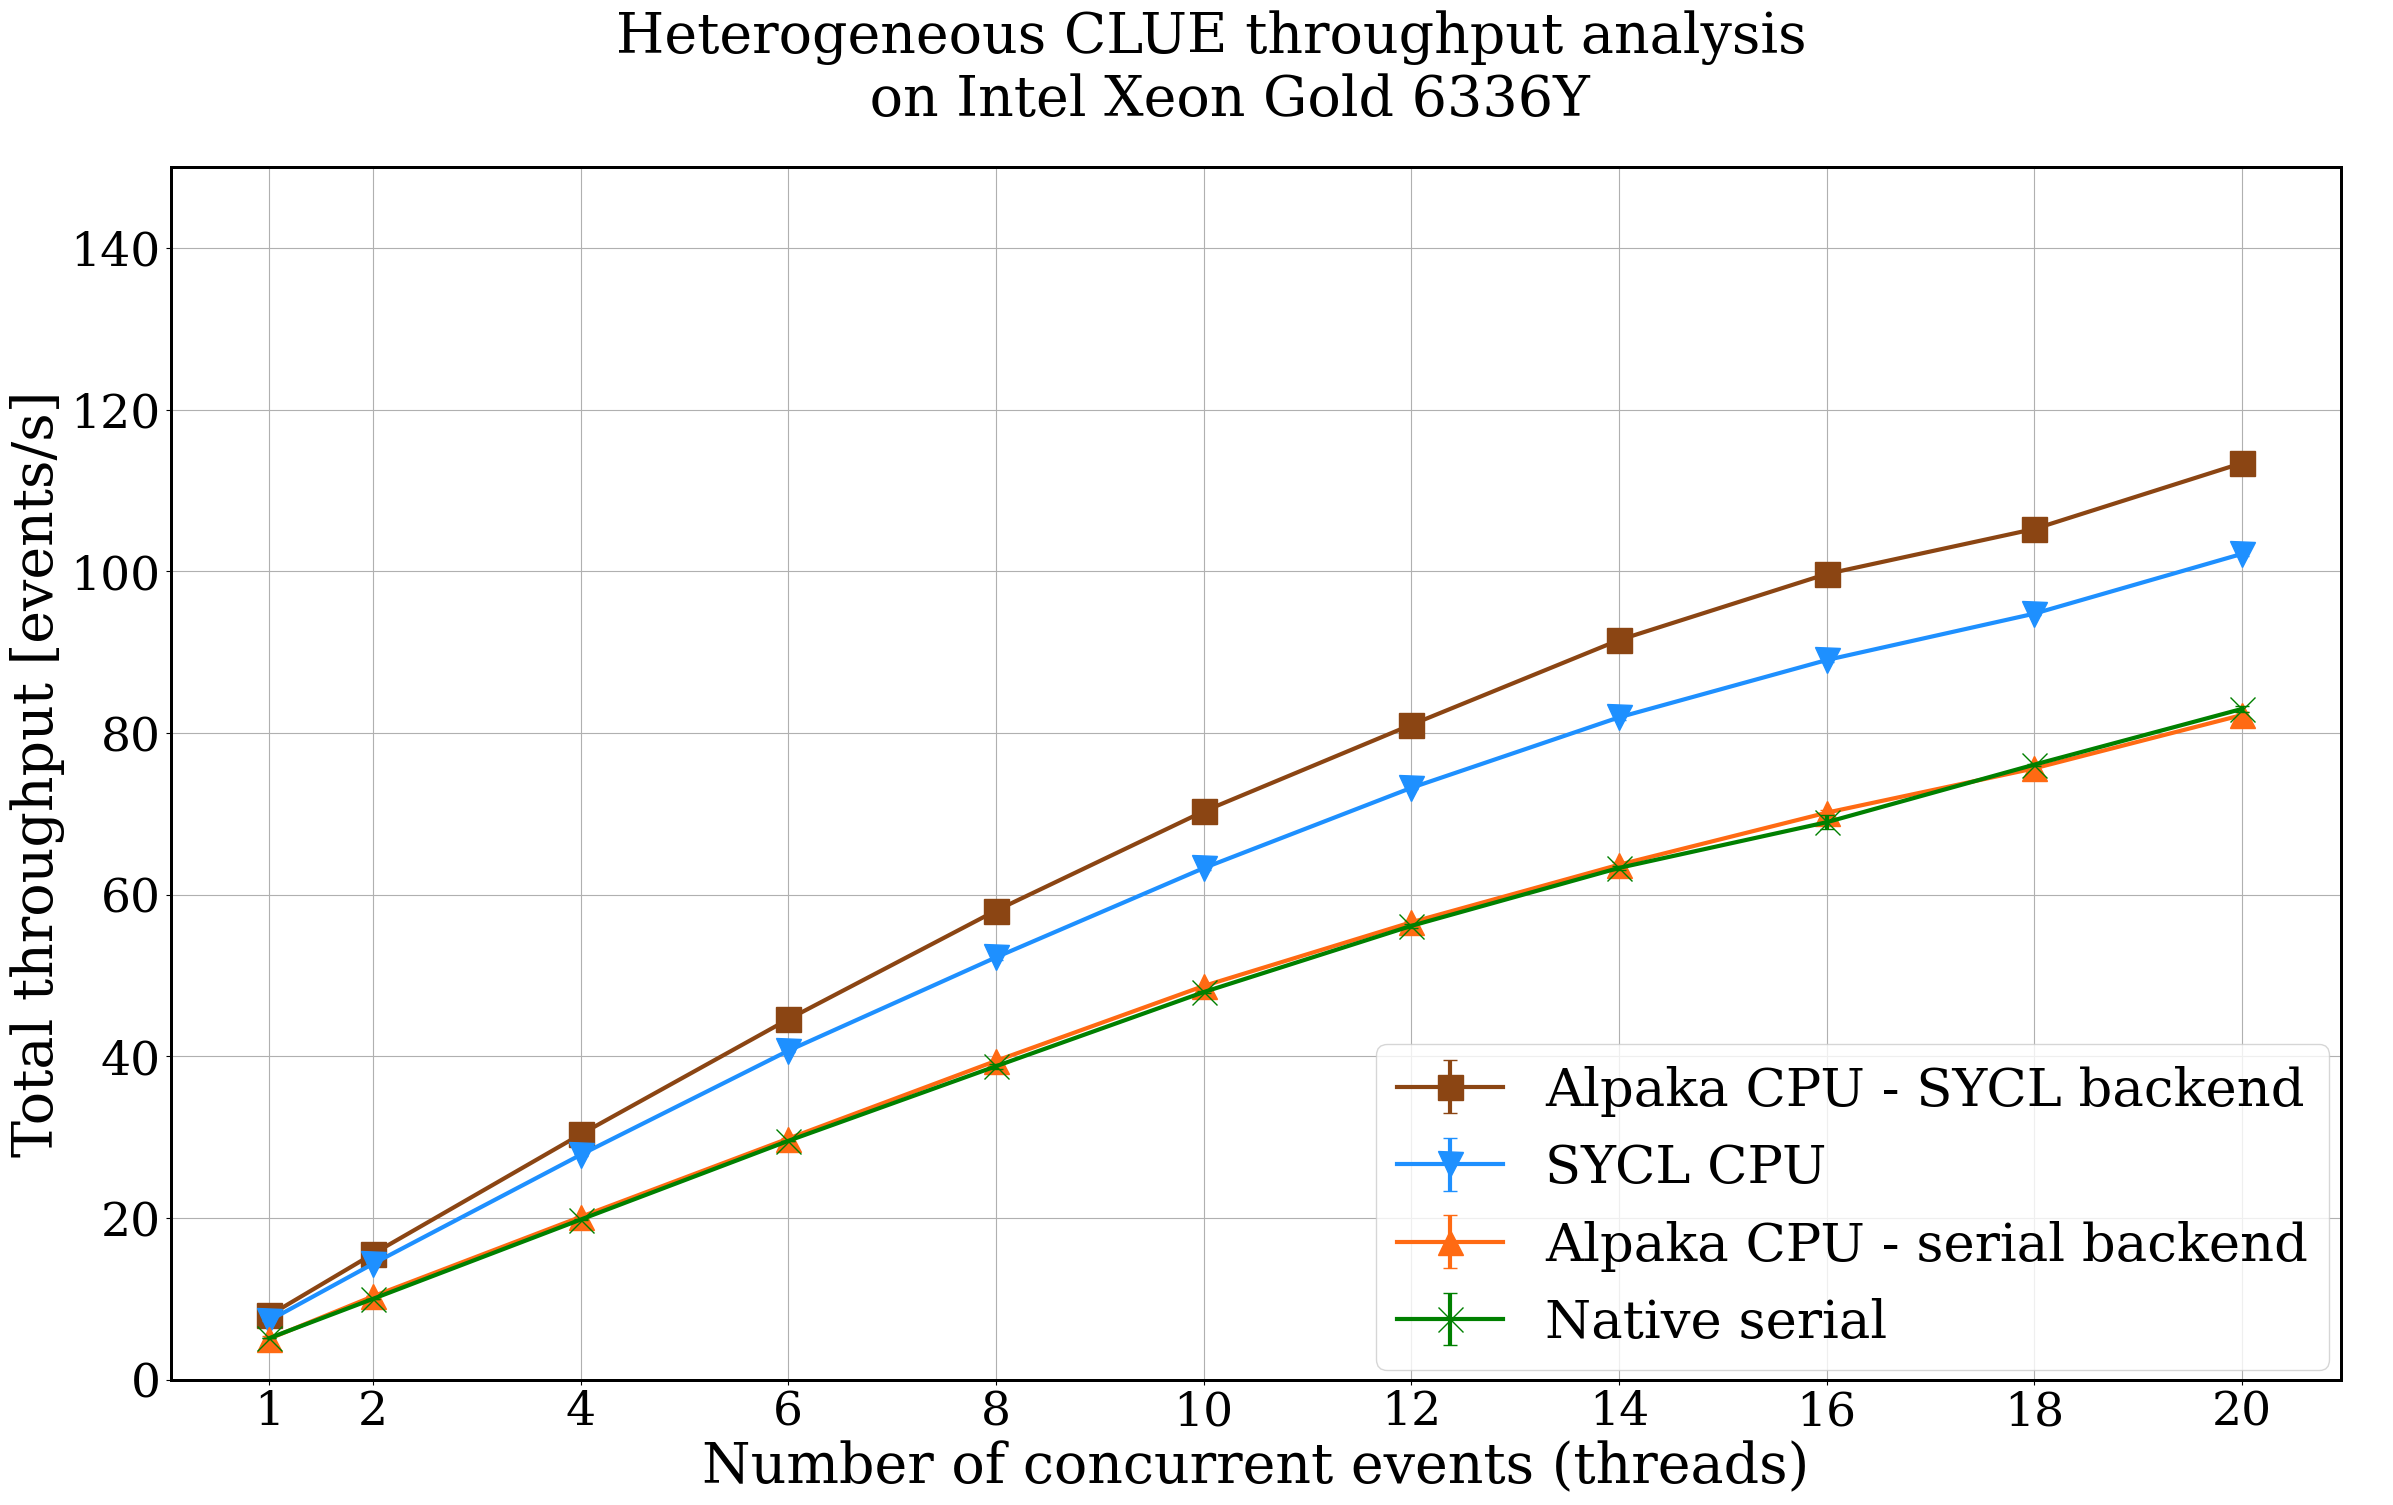

In [8]:
n_threads = (1,2,4,6,8,10,12,14,16,18,20)

serial = pd.read_csv("data/2d/alpaka_bench_olice/serial.csv")["mean"]
err_serial = pd.read_csv("data/2d/alpaka_bench_olice/serial.csv")["std"]

sycl_cpu = pd.read_csv("data/2d/alpaka_bench_olice/sycl_cpu.csv")["mean"]
err_sycl_cpu = pd.read_csv("data/2d/alpaka_bench_olice/sycl_cpu.csv")["std"]

alpaka_serial = pd.read_csv("data/2d/alpaka_bench_olice/alpaka_serial.csv")["mean"]
err_alpaka_serial = pd.read_csv("data/2d/alpaka_bench_olice/alpaka_serial.csv")["std"]

alpaka_sycl_cpu = pd.read_csv("data/2d/alpaka_bench_olice/alpaka_sycl_cpu.csv")["mean"]
err_alpaka_sycl_cpu = pd.read_csv("data/2d/alpaka_bench_olice/alpaka_sycl_cpu.csv")["std"]

fig,ax = plt.subplots()
ax.errorbar(n_threads, alpaka_sycl_cpu, err_alpaka_sycl_cpu, label="Alpaka CPU - SYCL backend", linewidth=3,
                marker='s', markersize=18, color='saddlebrown', mfc='saddlebrown', mec="saddlebrown", ecolor='saddlebrown', capsize=5)           
ax.set_xlabel("Number of concurrent events (threads)", fontsize = 40)
ax.set_ylabel("Total throughput [events/s]", fontsize=40)
ax.set_ylim(0,150)
ax.set_xticks(n_threads)
ax.grid(True)

ax2=ax.twiny()
ax2.axes.xaxis.set_visible(False)
ax2.errorbar(n_threads, sycl_cpu, err_sycl_cpu, label="SYCL CPU", linewidth=3, marker='v', markersize=18,
            color='dodgerblue', mfc='dodgerblue', mec="dodgerblue", ecolor='dodgerblue', capsize=5)     

ax3=ax.twiny()
ax3.axes.xaxis.set_visible(False)
ax3.errorbar(n_threads, alpaka_serial, err_alpaka_serial, label="Alpaka CPU - serial backend", linewidth=3, marker='^', markersize=18,
            color='#FF6A13', mfc='#FF6A13', mec="#FF6A13", ecolor='#FF6A13', capsize=5) 

ax3=ax.twiny()
ax3.axes.xaxis.set_visible(False)
ax3.errorbar(n_threads, serial, err_serial, label="Native serial", linewidth=3, marker='x', markersize=18,
            color='green', mfc='green', mec="green", ecolor='green', capsize=5) 



fig.suptitle("Heterogeneous CLUE throughput analysis \n on Intel Xeon Gold 6336Y", fontsize=40)
fig.legend(loc=(0.575,0.09), fontsize=38)